# Logistic Regression exercise

In [105]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

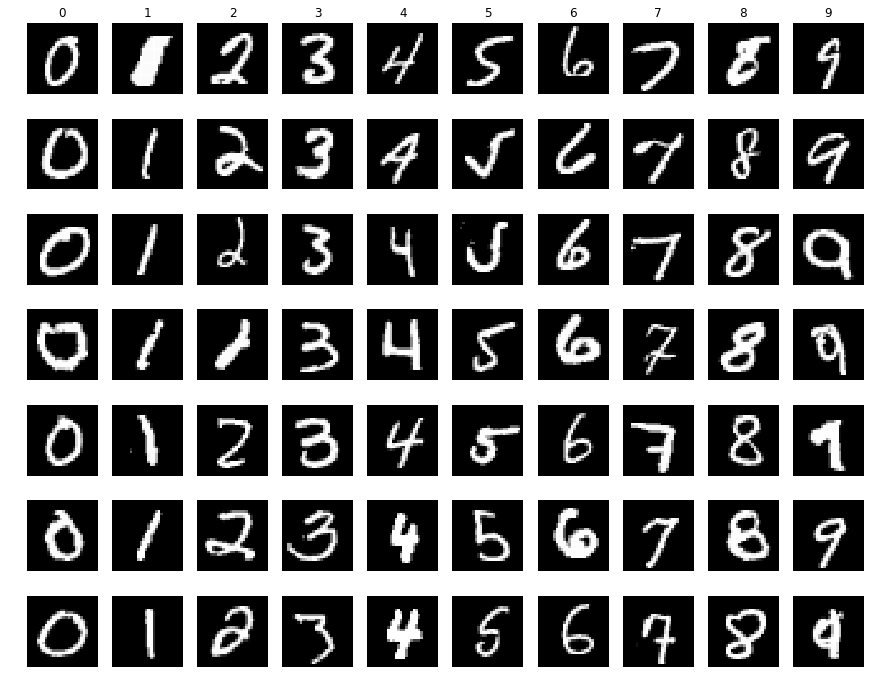

In [107]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [108]:
# transform the labels to binary
for i in xrange(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

# 最右侧加1处理
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000L, 785L)
(14000L, 785L)


In [109]:
# from sklearn.decomposition import PCA

# n_components = 400
# pca = PCA(n_components=n_components)
# pca.fit(X_train)
# X_train_feats = pca.transform(X_train) # choose and extract features

# pca.fit(X_test)
# X_test_feats = pca.transform(X_test) # choose and extract features

X_train_feats = X_train
X_test_feats = X_test
print X_train_feats.shape
print X_test_feats.shape

(28000L, 785L)
(14000L, 785L)


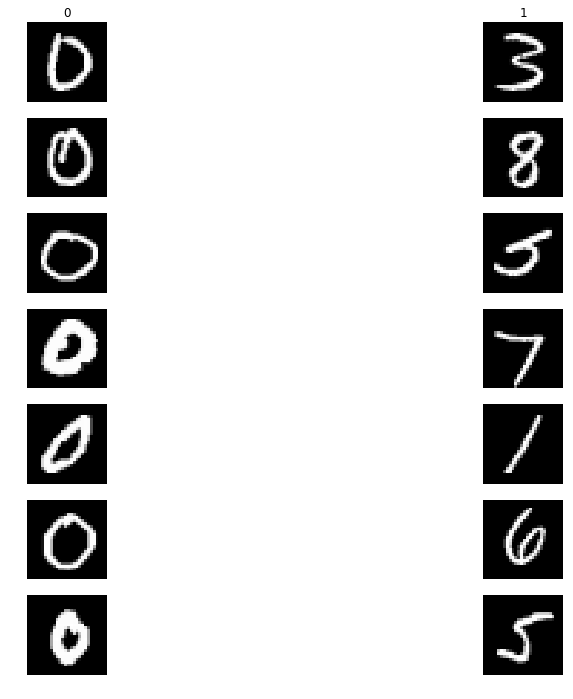

In [110]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [111]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-6,
    num_iters = 3000,
    batch_size = 64,
)

DSVC\classifiers\logistic_regression.py:117: RuntimeWarning: divide by zero encountered in divide
  v_dw = (beta * v_dw + (1 - beta) * grad) / (1 - beta ** it)
DSVC\classifiers\logistic_regression.py:117: RuntimeWarning: invalid value encountered in divide
  v_dw = (beta * v_dw + (1 - beta) * grad) / (1 - beta ** it)


iteration 0 / 3000: loss 1.021414
iteration 100 / 3000: loss 0.248309
iteration 200 / 3000: loss 0.038889
iteration 300 / 3000: loss 0.079494
iteration 400 / 3000: loss 0.079536
iteration 500 / 3000: loss 0.111016
iteration 600 / 3000: loss 0.064125
iteration 700 / 3000: loss 0.085630
iteration 800 / 3000: loss 0.086652
iteration 900 / 3000: loss 0.018331
iteration 1000 / 3000: loss 0.027565
iteration 1100 / 3000: loss 0.076059
iteration 1200 / 3000: loss 0.025299
iteration 1300 / 3000: loss 0.057152
iteration 1400 / 3000: loss 0.045244
iteration 1500 / 3000: loss 0.121026
iteration 1600 / 3000: loss 0.045781
iteration 1700 / 3000: loss 0.013891
iteration 1800 / 3000: loss 0.011041
iteration 1900 / 3000: loss 0.029728
iteration 2000 / 3000: loss 0.012293
iteration 2100 / 3000: loss 0.012041
iteration 2200 / 3000: loss 0.083188
iteration 2300 / 3000: loss 0.100586
iteration 2400 / 3000: loss 0.041320
iteration 2500 / 3000: loss 0.041404
iteration 2600 / 3000: loss 0.048086
iteration 270

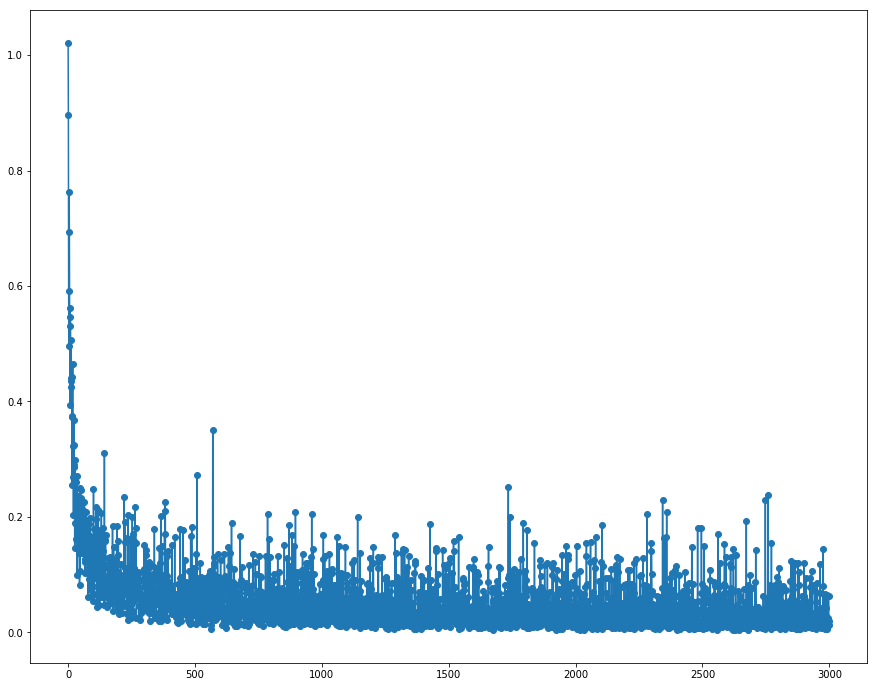

In [112]:
plt.scatter(range(len(loss_history)),loss_history)
plt.plot(loss_history)

In [113]:
y_test_pred = classifier.predict(X_test_feats)
print "The accuracy socre is ", np.mean(y_test == y_test_pred)

The accuracy socre is  0.9894285714285714


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [36]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
TP = float(((y_test==0) * (y_test_pred==0)).sum())
FN = float(((y_test==0) * (y_test_pred==1)).sum())
FP = float(((y_test==1) * (y_test_pred==0)).sum())
TN = float(((y_test==1) * (y_test_pred==1)).sum())
print 'TP',TP
print 'FN',FN
print 'FP',FP
print 'TN',TN

precision = TP/(TP + FP)
recall =TP/(TP + FN)

print 'precision:',precision
print 'recall:',recall
print 'F1:', precision*recall*2/(precision+recall)

TP 1335.0
FN 76.0
FP 0.0
TN 1577.0
precision: 1.0
recall: 0.946137491141
F1: 0.972323379461


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [57]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000L, 785L)
(14000L, 785L)


In [153]:
X_train_feats = X_train # choose and extract features
X_test_feats = X_test # choose and extract features

In [154]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
loss_historys = classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 5e-6,
    num_iters =1000,
    batch_size = 64,
)

('classify ', 0, '-----------------------')
iteration 0 / 1000: loss 96.087443
iteration 100 / 1000: loss 3.500496
iteration 200 / 1000: loss 0.823771
iteration 300 / 1000: loss 0.765042
iteration 400 / 1000: loss 1.091364
iteration 500 / 1000: loss 1.213111
iteration 600 / 1000: loss 0.721335
iteration 700 / 1000: loss 16.057569
iteration 800 / 1000: loss 0.767299
iteration 900 / 1000: loss 6.518258
('classify ', 1, '-----------------------')
iteration 0 / 1000: loss 37.293525
iteration 100 / 1000: loss 2.663303
iteration 200 / 1000: loss 1.013589
iteration 300 / 1000: loss 3.162633
iteration 400 / 1000: loss 1.825834
iteration 500 / 1000: loss 0.576236
iteration 600 / 1000: loss 1.904773
iteration 700 / 1000: loss 0.582992
iteration 800 / 1000: loss 0.706822
iteration 900 / 1000: loss 1.056746
('classify ', 2, '-----------------------')
iteration 0 / 1000: loss 47.790116
iteration 100 / 1000: loss 0.050395
iteration 200 / 1000: loss 0.080338
iteration 300 / 1000: loss 0.072210
iterat

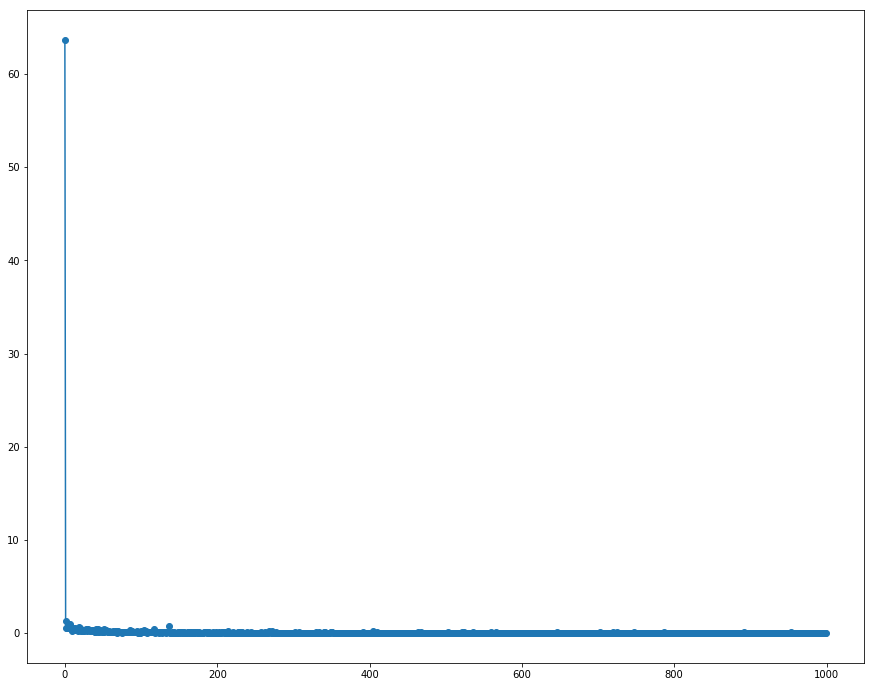

In [155]:
index = 3
plt.scatter(range(len(loss_historys[index])),loss_historys[index])
plt.plot(loss_historys[index])

In [160]:
# you may change your code in function `predict`
y_test_pred = classifier.predict(X_test_feats,one_vs_all=True)
print 'y_test',y_test.shape
print 'y_test_pred',y_test_pred.shape
print "The accruacy socre is ", np.mean(y_test == y_test_pred)


('y_pred1 row', (14000L,))
[8 9 0 ... 6 4 4]
1
y_test (14000L,)
y_test_pred (14000L,)
The accruacy socre is  0.0
